In [52]:
import math
import pandas as pd
import psycopg2
import getpass
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from keras.models import Model, Sequential
from keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt

In [20]:
path = 'dataset_sepsis.csv'
sepsis_dataset = pd.read_csv(path)

In [3]:
sepsis_dataset

,Unnamed: 0,icustay_id,hadm_id,sepsis_explicit,septic_shock_explicit,severe_sepsis_explicit,urineoutput,heartrate_min,heartrate_max,sysbp_min,...,peep,o2flow,requiredo2,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,specimen,specimen_pred
0,0,200021,109307,0,0,0,1120.0,66.0,83.0,94.0,...,0.0,0.0,0.0,15.0,4.0,0.0,1.0,1.0,ART,ART
1,8,200028,181955,0,0,0,43.0,66.0,81.0,91.0,...,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
2,9,200028,181955,0,0,0,43.0,66.0,81.0,91.0,...,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
3,10,200028,181955,0,0,0,43.0,66.0,81.0,91.0,...,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
4,11,200028,181955,0,0,0,43.0,66.0,81.0,91.0,...,0.0,0.0,0.0,15.0,1.0,0.0,1.0,1.0,0,ART
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15533,468488,299998,158288,1,0,1,400.0,65.0,69.0,127.0,...,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART
15534,468489,299998,158288,1,0,1,400.0,65.0,69.0,127.0,...,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART
15535,468490,299998,158288,1,0,1,400.0,65.0,69.0,127.0,...,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART
15536,468491,299998,158288,1,0,1,400.0,65.0,69.0,127.0,...,0.0,0.0,0.0,15.0,5.0,0.0,2.0,1.0,0,ART


In [4]:
sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']==1]
not_sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']!=1]

In [5]:
sepsis['icustay_id'].count()

1538

In [6]:
not_sepsis['icustay_id'].count()

14000

In [19]:
X = sepsis_dataset.iloc[:,6:-2]
Y = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
Y

0        0
1        0
2        0
3        0
4        0
        ..
15533    1
15534    1
15535    1
15536    1
15537    1
Name: sepsis_explicit, Length: 15538, dtype: int64

In [8]:
model = Sequential()
model.add(Dense(units=128,input_shape=(94,),activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12160     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 21,529
Trainable params: 21,529
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
389/389 [==============================] - 7s 19ms/step - loss: 0.2881 - accuracy: 0.9014 - val_loss: 0.2674 - val_accuracy: 0.8999
Epoch 2/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2580 - accuracy: 0.9031 - val_loss: 0.2556 - val_accuracy: 0.9054
Epoch 3/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2516 - accuracy: 0.9060 - val_loss: 0.2539 - val_accuracy: 0.9083
Epoch 4/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2476 - accuracy: 0.9098 - val_loss: 0.2530 - val_accuracy: 0.9057los
Epoch 5/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2423 - accuracy: 0.9098 - val_loss: 0.2539 - val_accuracy: 0.9089
Epoch 6/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2379 - accuracy: 0.9141 - val_loss: 0.2468 - val_accuracy: 0.9096uracy: 
Epoch 7/50
389/389 [==============================] - 6s 15ms/step - loss: 0.2315 - accuracy: 0.9146 - val_loss: 0.2496 - val_accura

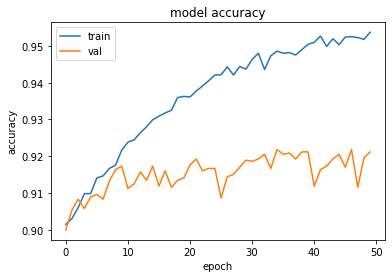

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
X = sepsis_dataset.iloc[:,6:-2]
y_true = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
y_pred = model.predict(X)
y_pred = np.round(y_pred)
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[13929    71]
 [  737   801]]
f1_score	:0.664730
recall_score	:0.520806
precision_score	:0.918578


In [51]:
#y_pred = sepsis_dataset['sepsis-3']
y_true = sepsis_dataset.iloc[:,3]
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[13929    71]
 [  737   801]]
f1_score	:0.664730
recall_score	:0.520806
precision_score	:0.918578


In [53]:
model.save('sepsis.model', save_format="h5")